<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Nonlinear-Classification" data-toc-modified-id="Nonlinear-Classification-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Nonlinear Classification</a></span></li><li><span><a href="#Neural-Networks" data-toc-modified-id="Neural-Networks-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Neural Networks</a></span></li><li><span><a href="#PyTorch-Implementation" data-toc-modified-id="PyTorch-Implementation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>PyTorch Implementation</a></span></li><li><span><a href="#Appendix" data-toc-modified-id="Appendix-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Appendix</a></span></li></ul></div>

# Nonlinear Classification

In [1]:
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn import neural_network
from sklearn import metrics
from sklearn import inspection
import torch

<AxesSubplot:>

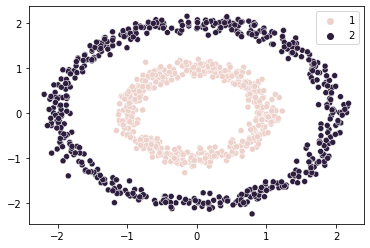

In [2]:
n = 1000
label = np.random.choice([1, 2], n)
d = np.random.normal(label, 0.1)
r = np.random.uniform(0, 2*np.pi, n)
x1 = d*np.cos(r)
x2 = d*np.sin(r)
sns.scatterplot(x=x1, y=x2, hue=label)

In [3]:
X = np.column_stack([x1, x2])
Y = np.where(label==label[0], 1, -1)
X.shape, Y.shape

((1000, 2), (1000,))

In [4]:
X.dtype, Y.dtype

(dtype('float64'), dtype('int64'))

[[517   0]
 [  0 483]]


<AxesSubplot:>

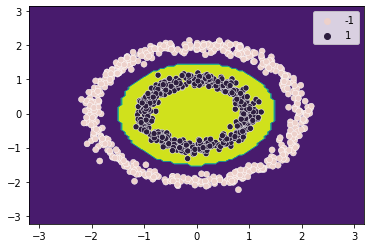

In [5]:
model = svm.SVC(kernel='rbf')
model.fit(X, Y)
Z = model.predict(X)

print( metrics.confusion_matrix(Y, Z) )

inspection.DecisionBoundaryDisplay.from_estimator(
        model,
        X,
        response_method="predict",
)

sns.scatterplot(x=x1, y=x2, hue=Y)

# Neural Networks

[[517   0]
 [  0 483]]


/nfs/home/cliu89/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


<AxesSubplot:>

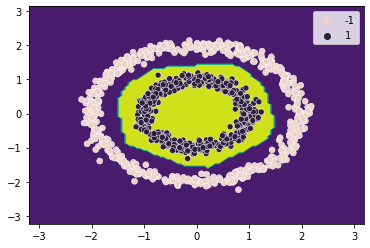

In [6]:
model = neural_network.MLPClassifier(activation='relu', hidden_layer_sizes=[10,5]) # 2*10+10*5+5*1 = 75
model.fit(X, Y)
Z = model.predict(X)

print( metrics.confusion_matrix(Y, Z) )

inspection.DecisionBoundaryDisplay.from_estimator(
    model,
    X,
    response_method="predict",
)

sns.scatterplot(x=x1, y=x2, hue=Y)

# PyTorch Implementation

In [7]:
from torch import nn
from skorch import NeuralNetClassifier

In [12]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 5)
        self.out = nn.Linear(5, 2)
        self.act1 = nn.ReLU()
        self.act2 = nn.ReLU()
        self.act = nn.Softmax(dim=1)
    def forward(self, x):
        y = x
        y = self.fc1(y)
        y = self.act1(y)
        y = self.fc2(y)
        y = self.act2(y)
        y = self.out(y)
        y = self.act(y)
        return y

class ModelClassifier(NeuralNetClassifier):
    def fit(self, X, Y):
        if hasattr(X, 'astype'): X = X.astype('float32')
        self.classes = np.unique(Y)
        Y = Y[:,None] == self.classes[None,:]
        Y = np.dot(Y, range(len(self.classes)))
        return super().fit(X, Y)
    def predict(self, X):
        if hasattr(X, 'astype'): X = X.astype('float32')
        Y = super().predict(X)
        Y = np.array([self.classes[y] for y in Y])
        return Y

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7276       0.0000        0.6993  0.0152
      2        0.6861       0.0000        0.6800  0.0117
      3        0.6710       0.0000        0.6674  0.0123
      4        0.6579       0.0850        0.6557  0.0122
      5        0.6456       0.0600        0.6439  0.0115
      6        0.6320       0.1600        0.6305  0.0129
      7        0.6181       0.2850        0.6148  0.0116
      8        0.6001       0.3400        0.5976  0.0118
      9        0.5805       0.2900        0.5775  0.0126
     10        0.5605       0.3000        0.5565  0.0115
     11        0.5387       0.2850        0.5354  0.0113
     12        0.5153       0.4150        0.5087  0.0114
     13        0.4869       0.4150        0.4786  0.0113
     14        0.4567       0.4550        0.4476  0.0113
     15        0.4233       0.4400        0.4077  0.0113
     16        0.3845       0.4

<AxesSubplot:>

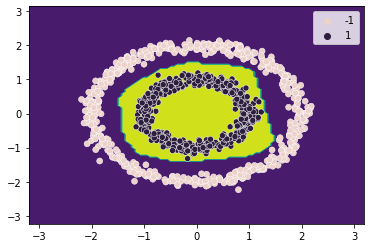

In [25]:
model = ModelClassifier(
    Model,
    max_epochs=50,
    lr=0.1,
    iterator_train__shuffle=True,
)
model.fit(X, Y)
Z = model.predict(X)

print( metrics.confusion_matrix(Y, Z) )

inspection.DecisionBoundaryDisplay.from_estimator(
    model,
    X,
    response_method="predict",
)

sns.scatterplot(x=x1, y=x2, hue=Y)

# Appendix

In [ ]:
def my_fun(r):
    def my_fun_r(x):
        return x**r
    return my_fun_r

[
my_fun(2)(4),
my_fun(3)(4),
my_fun(3)(2),
]

In [ ]:
class Animal:
    def __init__(self, name):
        self.animal_name = name
        self.has_moved = False
        print('Hello, my name is', self.animal_name)
    def move(self):
        self.has_moved = True
        print(self.animal_name, 'is moving ...')
        
my_pet = Animal('Bill')
my_pet.move()
my_pet.has_moved

In [ ]:
class Dog(Animal):
    animal_type = 'Dog'
    def __init__(self, name):
        super().__init__(name)
        print('My type is', self.animal_type)
    def move(self):
        super().move()
        print('I am running ...')

my_pet = Dog('Bill')
my_pet.move()
my_pet.has_moved, my_pet.animal_type